<a href="https://colab.research.google.com/github/KenDaupsey/Non-Parametric-Tests/blob/main/Two_Sample_Non_Parametric_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Non-Parametric Tests ***

*Wilcoxon-Sign-Rank Test*

In [1]:
### Firstly, we import the necessary libraries need for this procedure;

#### Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import wilcoxon  # Import the wilcoxon function from scipy.stats

In [2]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Two-Sample-Tests-in-Python/main/weight_loss_data.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())

   Before  After
0    77.5   73.9
1    74.3   71.0
2    78.2   75.8
3    82.6   77.7
4    73.8   70.4


Wilcoxon Signed-Rank Test: Statistic=0.0, p-value=0.0000


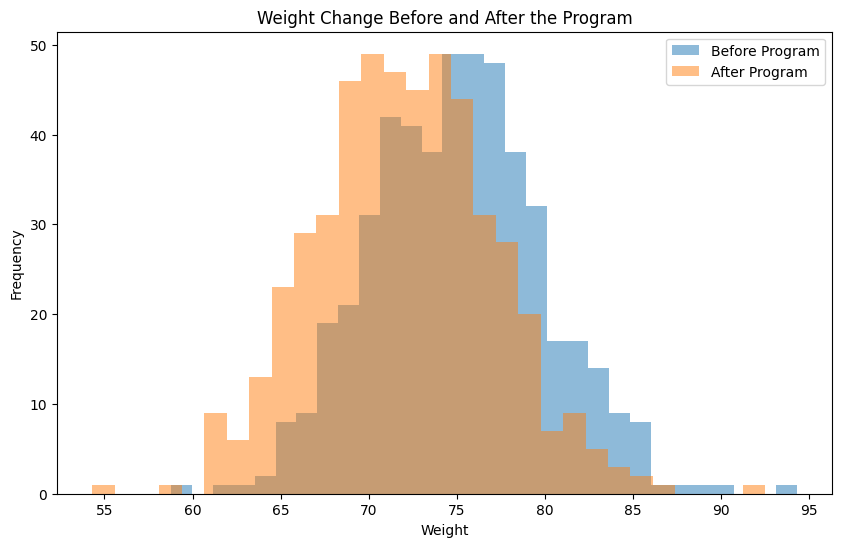

In [3]:
# Perform the Wilcoxon Signed-Rank test
wilcoxon_stat, wilcoxon_p_value = wilcoxon(df['Before'], df['After'])
print(f'Wilcoxon Signed-Rank Test: Statistic={wilcoxon_stat}, p-value={wilcoxon_p_value:.4f}')

# Plot the weight change distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Before'], alpha=0.5, label='Before Program', bins=30)
plt.hist(df['After'], alpha=0.5, label='After Program', bins=30)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.title('Weight Change Before and After the Program')
plt.show()

*Another Wilcoxon Signed Rank Sum Test*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Two-Sample-Tests-in-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())

    id  female   race     ses  schtyp      prog  read  write  math  science  \
0   70    male  white     low  public   general    57     52    41       47   
1  121  female  white  middle  public  vocation    68     59    53       63   
2   86    male  white    high  public   general    44     33    54       58   
3  141    male  white    high  public  vocation    63     44    47       53   
4  172    male  white  middle  public  academic    47     52    57       53   

   socst  
0     57  
1     61  
2     31  
3     56  
4     61  


In [6]:
#Wilcoxon signed rank test
import scipy.stats as stats
stats.wilcoxon(df['read']-df['write'])

WilcoxonResult(statistic=7944.0, pvalue=0.36626485210639514)

In [7]:
### Procedure elow makes p-value 4 decimal places
#Wilcoxon signed rank test
import scipy.stats as stats
import pandas as pd

# Assuming df is your DataFrame
# Wilcoxon signed-rank test between 'read' and 'write'
result = stats.wilcoxon(df['read'], df['write'])

# Print the result
print("Wilcoxon Signed-Rank Test:")
print(f"Test Statistic: {result.statistic:.4f}")
print(f"P-value: {result.pvalue:.4f}")

Wilcoxon Signed-Rank Test:
Test Statistic: 7944.0000
P-value: 0.3663


*Sign test*

In [8]:
import scipy.stats as stats
import pandas as pd

# Assuming df is your DataFrame

# Calculate the differences between 'read' and 'write'
diff = df['read'] - df['write']

# Count the number of positive and negative differences
num_positive_diff = sum(diff > 0)
num_negative_diff = sum(diff < 0)

# Perform a two-sided binomial test
n = len(diff)
p_value = stats.binom_test(min(num_positive_diff, num_negative_diff), n=n, alternative='two-sided')

# Print the result
print("Sign Test:")
print(f"Number of positive differences: {num_positive_diff}")
print(f"Number of negative differences: {num_negative_diff}")
print(f"P-value: {p_value:.4f}")

Sign Test:
Number of positive differences: 88
Number of negative differences: 97
P-value: 0.1036


<ipython-input-8-7fc143822d2f>:15: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(min(num_positive_diff, num_negative_diff), n=n, alternative='two-sided')


*Binomial Test*

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Two-Sample-Tests-in-Python/main/weight_loss_data.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())

   Before  After
0    77.5   73.9
1    74.3   71.0
2    78.2   75.8
3    82.6   77.7
4    73.8   70.4


In [11]:
import scipy.stats as stats
import pandas as pd

# Assuming df is your DataFrame
# Sign test between 'read' and 'write'
diff = df['Before'] - df['After']
num_positive_diff = sum(diff > 0)
result = stats.binom_test(num_positive_diff, n=len(diff), alternative='two-sided')

# Print the result
print("Binominal Test:")
print(f"Number of positive differences: {num_positive_diff}")
print(f"P-value: {result:.4f}")

Binominal Test:
Number of positive differences: 500
P-value: 0.0000


<ipython-input-11-17c88e97db67>:8: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  result = stats.binom_test(num_positive_diff, n=len(diff), alternative='two-sided')


*McNemar Test*

In [12]:
# McNemar test with contingency table
import math
import pandas as pd

# Given values
TP = 172
TN = 6
FP = 7
FN = 15

# Create a contingency table
contingency_table = pd.DataFrame({'Actual_Positive': [TP, FN], 'Actual_Negative': [FP, TN]}, index=['Predicted_Positive', 'Predicted_Negative'])

# Calculate Matthews correlation coefficient (MCC)
mcc = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Print the MCC
print(f"\nMatthews Correlation Coefficient (MCC): {mcc:.4f}")

Contingency Table:
                    Actual_Positive  Actual_Negative
Predicted_Positive              172                7
Predicted_Negative               15                6

Matthews Correlation Coefficient (MCC): 0.3067


*Mann-Whitney test*

In [13]:
#### Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Two-Sample-Tests-in-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())

    id  female   race     ses  schtyp      prog  read  write  math  science  \
0   70    male  white     low  public   general    57     52    41       47   
1  121  female  white  middle  public  vocation    68     59    53       63   
2   86    male  white    high  public   general    44     33    54       58   
3  141    male  white    high  public  vocation    63     44    47       53   
4  172    male  white  middle  public  academic    47     52    57       53   

   socst  
0     57  
1     61  
2     31  
3     56  
4     61  


In [15]:
df['female'].value_counts()

female    109
male       91
Name: female, dtype: int64

In [16]:
# Check the column names for any whitespace characters
print(df.columns)

# Remove whitespace characters from column names
df.columns = df.columns.str.strip()

# Now check if 'female' column exists
print('female' in df.columns)

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')
True


In [17]:
print(df['female'].dtype)


object


In [18]:
# Remove leading and trailing whitespaces from the 'female' column values
df['female'] = df['female'].str.strip()

## convert "female" to categorical data type
df['female'] = df['female'].astype('category')

In [19]:
df['female'].value_counts()

female    109
male       91
Name: female, dtype: int64

In [20]:
print(df['female'].dtype)

category


In [21]:
import seaborn as sns

In [22]:
### Final checks for the intergrity of dataset

import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming the dataset is already loaded into a pandas DataFrame called 'df'

# Check DataFrame information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       200 non-null    int64   
 1   female   200 non-null    category
 2   race     200 non-null    object  
 3   ses      200 non-null    object  
 4   schtyp   200 non-null    object  
 5   prog     200 non-null    object  
 6   read     200 non-null    int64   
 7   write    200 non-null    int64   
 8   math     200 non-null    int64   
 9   science  200 non-null    int64   
 10  socst    200 non-null    int64   
dtypes: category(1), int64(6), object(4)
memory usage: 16.1+ KB
None


In [23]:
# Check unique values in 'female' column
print(df['female'].unique())

# Check unique values in 'write' column
print(df['write'].unique())

['male', 'female']
Categories (2, object): ['female', 'male']
[52 59 33 44 46 57 55 65 60 63 49 39 40 37 38 31 67 41 54 62 47 61 42 43
 45 36 35 50 53]


In [24]:
# Select subsets of data based on the condition
subset_female = df.loc[df['female'] == 'female', 'write']
subset_male = df.loc[df['female'] == 'male', 'write']

In [25]:
# Check if subsets have a non-zero size before performing the test
if len(subset_female) > 0 and len(subset_male) > 0:
    # Perform the test
    statistic, p_value = mannwhitneyu(subset_female, subset_male)

    # Print the test results
    print("Mann-Whitney U statistic:", statistic)
    print("P-value:", round(p_value, 4))
else:
    print("Error: One or both subsets have a size of zero.")

Mann-Whitney U statistic: 6313.0
P-value: 0.0009


*Kruskal-Wallis Test*

In [26]:
#### Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Two-Sample-Tests-in-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())

    id  female   race     ses  schtyp      prog  read  write  math  science  \
0   70    male  white     low  public   general    57     52    41       47   
1  121  female  white  middle  public  vocation    68     59    53       63   
2   86    male  white    high  public   general    44     33    54       58   
3  141    male  white    high  public  vocation    63     44    47       53   
4  172    male  white  middle  public  academic    47     52    57       53   

   socst  
0     57  
1     61  
2     31  
3     56  
4     61  


In [28]:
df.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

In [29]:
import scipy.stats as stats
import pandas as pd

# Assuming df is your DataFrame
if 'prog' in df.columns:
    # Kruskal-Wallis test by 'prog'
    result = stats.kruskal(*[group['write'] for name, group in df.groupby('prog')])

    # Print the result
    print("Kruskal-Wallis Test:")
    print(f"Statistic: {result.statistic:.4f}")
    print(f"P-value: {result.pvalue:.4f}")
else:
    print("Error: Column 'prog' not found in the DataFrame.")

Kruskal-Wallis Test:
Statistic: 34.0452
P-value: 0.0000


*** Kruskal-Wallis Test  ***

In [30]:
#### Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:

# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Two-Sample-Tests-in-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
#print(df.head())

In [32]:
df.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

In [33]:
import scipy.stats as stats
import pandas as pd

# Assuming df is your DataFrame
if 'prog' in df.columns:
    # Kruskal-Wallis test by 'prog'
    result = stats.kruskal(*[group['write'] for name, group in df.groupby('prog')])

    # Print the result
    print("Kruskal-Wallis Test:")
    print(f"Statistic: {result.statistic:.4f}")
    print(f"P-value: {result.pvalue:.4f}")
else:
    print("Error: Column 'prog' not found in the DataFrame.")


Kruskal-Wallis Test:
Statistic: 34.0452
P-value: 0.0000


*** Kolmogorov-Smirnov (KS) Test With Plot***

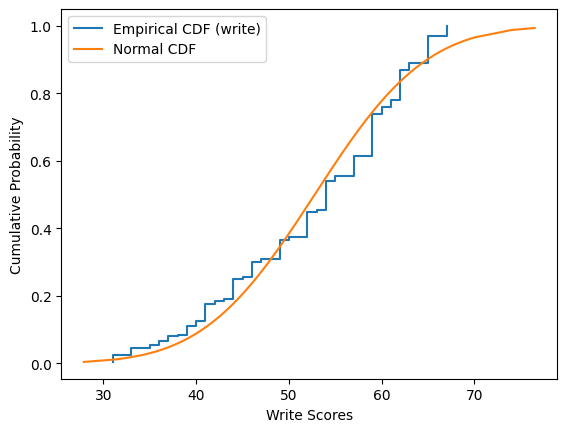

KS Statistic: 0.13485672359472245
P-value: 0.0012392145128983477


In [34]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
write_scores = df['write']

# Generate a sample from a normal distribution with the same mean and standard deviation
normal_sample = np.random.normal(np.mean(write_scores), np.std(write_scores), len(write_scores))

# Perform the KS test
ks_statistic, ks_p_value = kstest(write_scores, 'norm', args=(np.mean(write_scores), np.std(write_scores)))

# Plot the ECDF of 'write' scores and the CDF of the normal distribution
x = np.sort(write_scores)
y = np.arange(1, len(x) + 1) / len(x)
plt.step(x, y, label='Empirical CDF (write)')

x_norm = np.sort(normal_sample)
y_norm = np.arange(1, len(x_norm) + 1) / len(x_norm)
plt.plot(x_norm, norm.cdf(x_norm, np.mean(write_scores), np.std(write_scores)), label='Normal CDF')

plt.xlabel('Write Scores')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

# Print KS test results
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")

*** Friedman test ***

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/One-Way-Repeated-measures-ANOVA/main/Oneway%20Repeated%20Measures%20ANOVA%7Erb4.csv"
df = pd.read_csv(url)

In [37]:
df.head()

,Unnamed: 0,y,a,s
0,0,3.0,1,1.0
1,1,4.0,2,1.0
2,2,4.0,3,1.0
3,3,3.0,4,1.0
4,4,2.0,1,2.0


Friedman Test:
Chi-Square Statistic: 15.822222222222218
P-value: 0.0268


<Figure size 800x600 with 0 Axes>

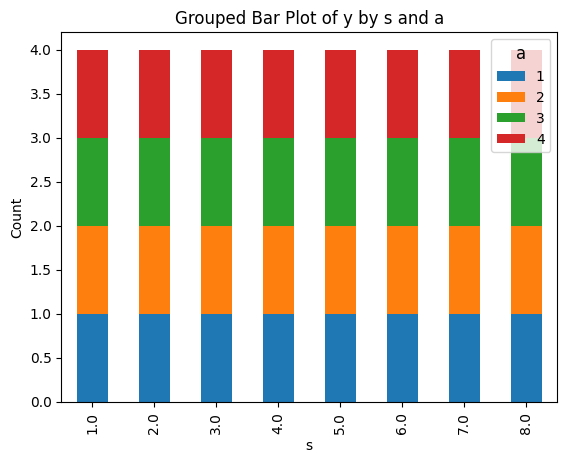

In [38]:
# One-way repeated measures Friedman test
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare

# Assuming your data is stored in a DataFrame called df4
# Keep only the specified columns
df_subset = df[['y', 's', 'a']]

# Perform Friedman test
statistic, p_value = friedmanchisquare(*df_subset.groupby('s')['y'].apply(list))

# Print the result
print("Friedman Test:")
print(f"Chi-Square Statistic: {statistic}")
print(f"P-value: {p_value:.4f}")

# Create a grouped bar plot for visualization
plt.figure(figsize=(8, 6))
df_subset.groupby(['s', 'a']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Grouped Bar Plot of y by s and a')
plt.xlabel('s')
plt.ylabel('Count')
plt.legend(title='a', title_fontsize='12')
plt.show()